<a href="https://colab.research.google.com/github/muhammadalfateh6/Muhammad_Alfateh_Work/blob/main/CNN_Mnist_Fation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D
import matplotlib.pyplot as plt
import numpy as npp
import pandas as pdd

In [ ]:
model = Sequential([
    Conv2D(16, (3,3), input_shape=(28,28,1), padding='same', strides=1, activation='relu'),
    MaxPool2D((3,3)),
    Flatten(),
    Dense(10, activation='softmax')
])


In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()
model.compile(optimizer=opt,
              loss ='sparse_categorical_crossentropy',
              metrics=[acc, mae])

In [ ]:
mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() 

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]
print(train_labels[53])

2


the label is: Ankle boot


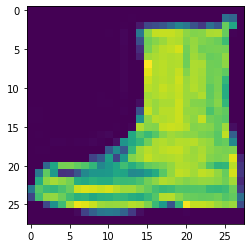

In [ ]:
train_images = train_images/ 255.
test_images = test_images/ 255.

i=646
im = train_images[i,:,:]
plt.imshow(im)
print(f"the label is: {labels[train_labels[i]]}")

In [ ]:
history = model.fit(train_images[...,npp.newaxis], train_labels, epochs=8, batch_size=256, verbose=1)

Epoch 1/8
235/235 [==============================] - 17s 72ms/step - loss: 0.2401 - sparse_categorical_accuracy: 0.9142 - mean_absolute_error: 4.4200
Epoch 2/8
235/235 [==============================] - 17s 72ms/step - loss: 0.2361 - sparse_categorical_accuracy: 0.9146 - mean_absolute_error: 4.4200
Epoch 3/8
235/235 [==============================] - 17s 72ms/step - loss: 0.2290 - sparse_categorical_accuracy: 0.9180 - mean_absolute_error: 4.4200
Epoch 4/8
235/235 [==============================] - 17s 74ms/step - loss: 0.2263 - sparse_categorical_accuracy: 0.9184 - mean_absolute_error: 4.4200
Epoch 5/8
235/235 [==============================] - 19s 81ms/step - loss: 0.2223 - sparse_categorical_accuracy: 0.9193 - mean_absolute_error: 4.4200
Epoch 6/8
235/235 [==============================] - 17s 71ms/step - loss: 0.2205 - sparse_categorical_accuracy: 0.9204 - mean_absolute_error: 4.4200
Epoch 7/8
235/235 [==============================] - 17s 72ms/step - loss: 0.2148 - sparse_categoric

In [ ]:
df = pdd.DataFrame(history.history)
df.head()

,loss,sparse_categorical_accuracy,mean_absolute_error
0,0.521371,0.820833,4.420000
1,0.343187,0.880133,4.419999
2,0.308684,0.891117,4.420002
3,0.289494,0.898400,4.419999
4,0.273252,0.903167,4.420000


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

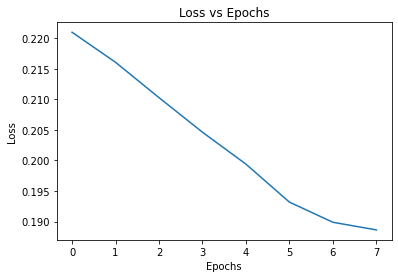

In [ ]:
lossplot = df.plot(y="loss", title="Loss vs Epochs", legend=False)
lossplot.set(xlabel="Epochs", ylabel="Loss")

In [ ]:
evaluation = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 2s - loss: 0.2915 - sparse_categorical_accuracy: 0.8993 - mean_absolute_error: 4.4200 - 2s/epoch - 6ms/step


Label: Sandal


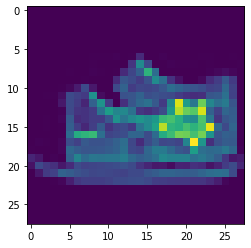

In [ ]:
idx = 9999
theimage= test_images[idx]
plt.imshow(theimage)
print(f"Label: {labels[test_labels[idx]]}")

In [ ]:
pred = model.predict(theimage[npp.newaxis,...,npp.newaxis])
print(f"Prediction: {labels[npp.argmax(pred)]}")

1/1 [==============================] - 0s 24ms/step
Prediction: Sandal
